In [7]:
from rdkit import Chem
import pandas as pd

In [8]:
df = pd.read_csv('/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/Canonical_X12K_WDR5_AS-MS_Data.csv')
df

,Scan,Peptide,ALC (%),m/z,z,RT,Mass,ppm,Uniqueness,Name,Obs Parent Mass
0,2517,GVKGGQVMKGGVK,91,409.9232,3,18.09,1226.7458,1.5,UNIQUE,328-058_5-WDR5 results 2023-02-03 22-02,1226.7477
1,3837,GVGGKKVMASLTK,87,420.2676,3,25.99,1257.7769,3.3,UNIQUE,328-058_6-WDR5 results 2023-02-03 22-11,1257.7809
2,11892,VGGVAGLVLWVAK,95,634.3977,2,65.73,1266.7812,-0.3,UNIQUE,328-058_6-WDR5 results 2023-02-03 22-11,1266.7808
3,10788,GGGGFVTVWGHSK,85,644.3354,2,60.05,1286.6521,3.3,UNIQUE,328-058_6-WDR5 results 2023-02-03 22-11,1286.6562
4,3334,KQNDGSFTGVGAK,92,654.3406,2,23.16,1306.6628,2.9,UNIQUE,328-058_6-WDR5 results 2023-02-03 22-11,1306.6666
...,...,...,...,...,...,...,...,...,...,...,...
3785,11599,WWEEWTNWRYFYK,93,664.9780,3,66.48,1991.9106,0.8,UNIQUE,328-058_4-WDR5 results 2023-02-03 21-50,1991.9121
3786,9827,FVWYWMWWRMRYK,97,502.0151,4,57.41,2004.0312,0.0,UNIQUE,328-058_4-WDR5 results 2023-02-03 21-50,2004.0312
3787,12020,KWWWWLNWYHPWK,95,672.3401,3,66.19,2013.9944,2.0,UNIQUE,328-058_6-WDR5 results 2023-02-03 22-11,2013.9984
3788,9863,WWQNYHDFHWWWK,93,505.2316,4,57.67,2016.8960,0.7,UNIQUE,328-058_4-WDR5 results 2023-02-03 21-50,2016.8972


In [11]:
count = 0
for peptide in df["Peptide"]:
    if "EEIDVV" in peptide: # This is an important peptide sequence that is present in Myc and binds to WDR5
        count += 1
count

0

In [3]:
len(set(df['Peptide'])), len(df['Peptide'])

(3790, 3790)

In [4]:
smiles = []
for peptide in df['Peptide']:
    mol = Chem.MolFromSequence(peptide)
    smiles.append(Chem.MolToSmiles(mol))

In [5]:
docking_df = pd.DataFrame({'complex_name': df['Peptide'], 
                           'protein_path': ['/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/docking_files/4y7r_chain_A.pdb']*len(df), 
                           'ligand_description': smiles, 'protein_sequence': [None]*len(df)})
docking_df.to_csv('/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/docking_files/4y7r_chain_A_docking.csv', index=False)

In [42]:
for i in range(0, len(docking_df), 500):
    docking_df[i:min(i+500, len(docking_df))].to_csv(f'/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/docking_files/4y7r_chain_A_docking_{i//500}.csv', index=False)

In [28]:
from Bio.PDB import PDBParser, PDBIO

def extract_chain(pdb_filename, output_filename, chain_id):
    # Create a PDB parser
    parser = PDBParser()

    # Parse the structure from file
    structure = parser.get_structure('PDB', pdb_filename)

    # Create a PDBIO object
    io = PDBIO()

    # Iterate over all models in the structure
    for model in structure:
        # We will write only the first model that contains chain A
        for chain in model:
            if chain.id == chain_id:
                # Set the structure for the output
                io.set_structure(chain)
                # Save the chain to a new file
                io.save(output_filename)
                return

# Example usage:
extract_chain('/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/4y7r.pdb', '/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/4y7r_chain_A.pdb', 'A')

/n/home13/afang/.conda/envs/interactenv1/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5484.
  warnings.warn(
/n/home13/afang/.conda/envs/interactenv1/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5673.
  warnings.warn(


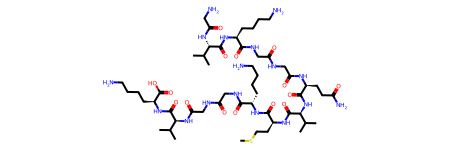

In [49]:
mol = Chem.MolFromSequence(df["Peptide"][0])
mol

## Get SMILES strings for non canonical peptides

In [23]:
NONCANONICAL_SMILES = {
    '2FF':'N[C@@H](Cc1ccccc1C(F)(F)F)C(=O)O',
    '3Py':'N[C@@H](Cc1cccnc1)C(=O)O',
    '4Af':'Nc1ccc(C[C@H](N)C(=O)O)cc1',
    'Aad':'N[C@@H](CCCC(=O)O)C(=O)O',
    'Agb':'N=C(N)NCC[C@H](N)C(=O)O',
    'Agn':'CC(=O)N[C@H]1[C@H](NC(=O)C[C@H](N)C(=O)O)O[C@H](CO)[C@@H](O)[C@@H]1O',
    'Aib':'CC(C)(N)C(=O)O',
    'Ala':'C[C@H](N)C(=O)O',
    'Amb':'NCc1ccc(C(=O)O)cc1',
    'Amf':'NCc1ccc(C[C@H](N)C(=O)O)cc1',
    'Apr':'N[C@@H]1CN[C@H](C(=O)O)C1',
    'Arg':'N=C(N)NCCC[C@H](N)C(=O)O',
    'Asn':'NC(=O)C[C@H](N)C(=O)O',
    'Asp':'N[C@@H](CC(=O)O)C(=O)O',
    'Aze':'O=C(O)C1CCN1',
    'Bpl':'N[C@@H](CCCCN(Cc1ccccn1)Cc1ccccn1)C(=O)O',
    'Cit':'NC(=O)NCCC[C@H](N)C(=O)O',
    'Cpa':'N[C@@H](CC1CC1)C(=O)O',
    'Cpg':'N[C@H](C(=O)O)C1CCCC1',
    'Cpz':'O=C(O)CN1CCNCC1',
    'Cxf':'N[C@@H](Cc1ccc(C(=O)O)cc1)C(=O)O',
    'Cys':'C([C@@H](C(=O)O)N)S',
    'Dab':'NCC[C@H](N)C(=O)O',
    'DfF':'N[C@@H](Cc1ccc(F)c(F)c1)C(=O)O',
    'Dmf':'COc1ccc(C[C@H](N)C(=O)O)cc1OC',
    'Dpf':'CCOP(=O)(Cc1ccc(C[C@H](N)C(=O)O)cc1)OCC',
    'Dph':'N[C@H](C(=O)O)C(c1ccccc1)c1ccccc1',
    'Git':'N[C@@H](CCCNC(=O)N[C@@H]1O[C@H](CO)[C@H](O)[C@H](O)[C@H]1O)C(=O)O',
    'Gln':'NC(=O)CC[C@H](N)C(=O)O',
    'Glu':'N[C@@H](CCC(=O)O)C(=O)O',
    'Gly':'NCC(=O)O',
    'Gph':'N=C(N)Nc1ccc(C[C@H](N)C(=O)O)cc1',
    'hAr':'N=C(N)NCCCC[C@H](N)C(=O)O',
    'Har':'N=C(N)NCCCC[C@H](N)C(=O)O',
    'hCi':'NC(=O)NCCCC[C@H](N)C(=O)O',
    'His':'N[C@@H](Cc1cnc[nH]1)C(=O)O',
    'hPh':'N[C@@H](CCc1ccccc1)C(=O)O',
    'Hyp':'O=C(O)[C@@H]1C[C@@H](O)CN1',
    'Ile':'CC[C@H](C)[C@@H](C(=O)O)N',
    'Leu':'CC(C)C[C@H](N)C(=O)O',
    'Lys':'NCCCC[C@H](N)C(=O)O',
    'Met':'CSCC[C@H](N)C(=O)O',
    'MfF':'N[C@@H](Cc1cccc(F)c1)C(=O)O',
    'Mox':'COCC[C@H](N)C(=O)O',
    'Msn':'CS(=O)(=O)CC[C@H](N)C(=O)O',
    'Nal':'N[C@@H](Cc1cccc2ccccc12)C(=O)O',
    'PfF':'N[C@@H](Cc1c(F)c(F)c(F)c(F)c1F)C(=O)O',
    'Phe':'N[C@@H](Cc1ccccc1)C(=O)O',
    'Php':'O=C(O)C1(c2ccccc2)CCNCC1',
    'Pip':'NC1(C(=O)O)CCNCC1',
    'Pro':'O=C(O)[C@@H]1CCCN1',
    'Psa':'NC[C@H](NS(=O)(=O)c1ccccc1)C(=O)O',
    'pSe':'N[C@@H](COP(=O)(O)O)C(=O)O',
    'Pty':'N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)O',
    'Ser':'N[C@@H](CO)C(=O)O',
    'Sty':'N[C@@H](C/C=C/c1ccccc1)C(=O)O',
    'Tff':'N[C@@H](Cc1cc(F)c(F)c(F)c1)C(=O)O',
    'Tfp':'N[C@@H](Cc1ccc(C(F)(F)F)cc1)C(=O)O',
    'Tha':'N[C@@H](Cc1cscn1)C(=O)O',
    'Thp':'NC1(C(=O)O)CCOCC1',
    'Thr':'C[C@@H](O)[C@H](N)C(=O)O',
    'Tic':'O=C(O)[C@@H]1Cc2ccccc2CN1',
    'Tle':'CC(C)(C)[C@H](N)C(=O)O',
    'Trp':'N[C@@H](Cc1c[nH]c2ccccc12)C(=O)O',
    'Tyr':'N[C@@H](Cc1ccc(O)cc1)C(=O)O',
    'Val':'CC(C)[C@H](N)C(=O)O',
}

UNMATCHED_NONCANONICAL_AAS = {"Aib","Amb","Cpz","Gly","Php","Pip","Psa","Thp"}

In [50]:
def get_amino_acid_backbone(molecule, monomers_aa):
    aa_backbone = "[$([NX3H2,NX4H3+]),$([NX3H](C)(C))][CX4H]([*])[CX3](=[OX1])[OX2H,OX1-,N]"
    # aa_backbone = '[NX3,NX4+][CX4H]([*])[CX3](=[OX1])[O,N]'
    aa_pattern = Chem.MolFromSmarts(aa_backbone)
    matches = molecule.GetSubstructMatches(aa_pattern)
    molecule = Chem.AddHs(molecule) # add Hs after SMARTS matching

    match_idx = 0
    curr_atoms = 0

    output = []
    for monomer in monomers_aa:
        backbone_indices = {}

        monomer_natoms = Chem.MolFromSmiles(NONCANONICAL_SMILES[monomer]).GetNumAtoms()
        if monomer in UNMATCHED_NONCANONICAL_AAS:
            match = list(range(curr_atoms, curr_atoms+monomer_natoms))
        else:
            match = matches[match_idx]
            match_idx += 1
        
        curr_atoms += monomer_natoms

        if monomer in ["Pip", "Psa"]: # these monomers have two NHX groups, the NH2 group is the amide forming one
            min_NHX = 2
        else:
            min_NHX = 1
        
        for atom in match:
            atom = molecule.GetAtomWithIdx(atom)
            if atom.GetSymbol() == 'N':
                H_neighbours = []
                for neighbour_atom in atom.GetNeighbors():
                    if neighbour_atom.GetSymbol() == 'H':
                        H_neighbours.append(neighbour_atom.GetIdx())
                if len(H_neighbours) >= min_NHX:
                    backbone_indices['NHX'] = [atom.GetIdx()] + H_neighbours
            elif atom.GetSymbol() == 'C':
                carbonyl_O = None
                alcohol_O = None
                alcohol_H = None
                for neighbour_atom in atom.GetNeighbors():
                    if neighbour_atom.GetSymbol() == 'O':
                        if len(neighbour_atom.GetNeighbors()) == 1:
                            carbonyl_O = neighbour_atom.GetIdx()
                        else:
                            func_group = sorted([(neighbour.GetSymbol(), neighbour.GetIdx()) for neighbour in neighbour_atom.GetNeighbors()])
                            if [x[0] for x in func_group] == ['C', 'H']:
                                alcohol_O = neighbour_atom.GetIdx()
                                alcohol_H = func_group[1][1]
                if (carbonyl_O is not None) and (alcohol_H is not None) and (alcohol_O is not None):
                    backbone_indices['COOH'] = [atom.GetIdx(), carbonyl_O, alcohol_O, alcohol_H]
        output.append(backbone_indices)
    return output

In [47]:
def get_peptide(*monomers_aa): 
    """
    Grows monomers from N to C terminus.
    Monomoers: list of smiles
    """
    monomers = [NONCANONICAL_SMILES[x] for x in monomers_aa]
    monomers = [Chem.MolFromSmiles(x) for x in monomers]
    molecule = Chem.CombineMols(monomers[0], monomers[1])
    for monomer in monomers[2:]:
        molecule = Chem.CombineMols(molecule, monomer)

    backbone_indexes = get_amino_acid_backbone(molecule, monomers_aa)
    assert len(backbone_indexes) == len(monomers), "num monomers does not match num backbone matches"
    molecule = Chem.AddHs(molecule) # add Hs after SMARTS matching
    molecule_edit = Chem.rdchem.EditableMol(molecule)

    to_remove = []
    for i in range(len(backbone_indexes)-1):
        C0, _, O0, H0 = backbone_indexes[i]['COOH']
        N1, H1 = backbone_indexes[i+1]['NHX'][:2]

        # C(monomer 0)-N(monomer 1) bond
        molecule_edit.AddBond(C0, N1, Chem.rdchem.BondType.SINGLE)

        # Remove the H from the NH2 group which forms the amide (monomer 1)
        # Remove the OH from the carboxylic acid (monomer 0)
        to_remove.extend([H1, O0, H0])
    # Must remove atoms in reverse order, otherwise the indices will change
    for atom in sorted(to_remove, reverse=True):
        molecule_edit.RemoveAtom(atom)

    peptide = molecule_edit.GetMol()
    peptide = Chem.RemoveHs(peptide)
    return peptide

### SMARTS string does not match these amino acids
We will ignore peptides with these for now, in the future need to define SMARTS string / ways to identify the backbone atoms for these

In [40]:
error_aas = []
for key, smiles in NONCANONICAL_SMILES.items():
    backbone = get_amino_acid_backbone(Chem.MolFromSmiles(smiles), [key])
    if len(backbone) != 1:
        print(key, smiles)
        error_aas.append(key)
    elif len(backbone[0]) != 2:
        print(key, smiles, backbone)

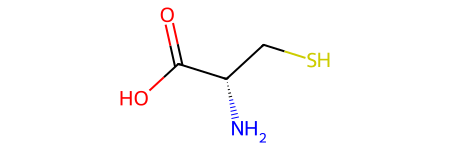

In [41]:
molecule = Chem.MolFromSmiles(noncanonical_smiles['Cys'])
molecule

* Aib CC(C)(N)C(=O)O - use all atoms
* Amb NCc1ccc(C(=O)O)cc1 - use all atoms
* Gly use all atoms
* Thp use all atoms
* Cpz use all atoms
* Php use all atoms

These are suspicious
* Pip is a little suspicious as there are two amine groups
* Psa is a little suspicious as there are two amine groups


In [42]:
import ast
noncanonical_df = pd.read_csv("/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/Noncanonical X12K WDR5 AS-MS Data 3Letter.csv")
noncanonical_df['New_Peptide'] = noncanonical_df['New_Peptide'].apply(ast.literal_eval)

In [43]:
filtered_nc_peptides = []
for peptide in noncanonical_df['New_Peptide']:
    if all([aa not in error_aas for aa in peptide]):
        filtered_nc_peptides.append(peptide)
len(filtered_nc_peptides), len(noncanonical_df['New_Peptide'])

(742, 742)

In [51]:
filtered_nc_peptides_smiles = []
filtered_names = []
for peptide in filtered_nc_peptides:
    filtered_names.append("_".join(peptide))
    filtered_nc_peptides_smiles.append(Chem.MolToSmiles(get_peptide(*peptide)))

In [52]:
noncanonical_docking_df = pd.DataFrame({
    'complex_name': filtered_names, 'protein_path': ['/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/6wjq_chain_A.pdb']*len(filtered_names), 
    'ligand_description': filtered_nc_peptides_smiles, 'protein_sequence': [None]*len(filtered_names)})
noncanonical_docking_df.to_csv('/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/6wjq_chain_A_docking_noncanonical_filtered.csv', index=False)

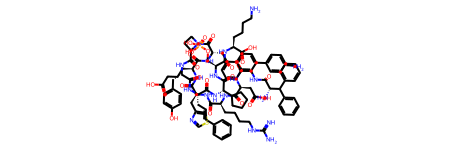

In [57]:
import random
smiles = random.choice(filtered_nc_peptides_smiles)
mol = Chem.MolFromSmiles(smiles)
mol

# Investigate Docked Structures with DiffDock

In [1]:
import glob
import pandas as pd

# canonical
dirs = glob.glob("/n/holyscratch01/mzitnik_lab/afang/WDR5_docked/**")
df = pd.read_csv("/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/docking_files/6wjq_chain_A_docking.csv")

# canonical docked to 4y7r, has WBM binding pocket
dirs = glob.glob("/n/holyscratch01/mzitnik_lab/afang/WDR5_docked_4y7r/**")
df = pd.read_csv("/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/docking_files/4y7r_chain_A_docking.csv")

# # non-canonical
# dirs = glob.glob("/n/holyscratch01/mzitnik_lab/afang/WDR5_docked_noncanonical/**")
# df = pd.read_csv("/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/6wjq_chain_A_docking_noncanonical_filtered.csv")

In [2]:
import os
from rdkit import Chem
from tqdm import tqdm

def read_sdf_and_get_coordinates(sdf_file):
    # Read the SDF file
    supplier = Chem.SDMolSupplier(sdf_file)
    molecules = [mol for mol in supplier if mol is not None]

    # Dictionary to store coordinates for each molecule
    molecule_coordinates = {}

    # Iterate through each molecule
    for idx, mol in enumerate(molecules):
        coords = []
        conf = mol.GetConformer()
        for atom in mol.GetAtoms():
            pos = conf.GetAtomPosition(atom.GetIdx())
            coords.append((pos.x, pos.y, pos.z))
        molecule_coordinates[f'Molecule_{idx}'] = coords

    return molecule_coordinates

coords = {}
for dir_ in tqdm(dirs, total=len(dirs)):
    files = os.listdir(dir_)
    if len(files) > 0:
        coords[dir_] = read_sdf_and_get_coordinates(os.path.join(dir_, "rank1.sdf"))


100%|██████████| 3790/3790 [22:46<00:00,  2.77it/s]


In [3]:
import numpy as np

means = {}
for key, val in coords.items():
    means[key] = np.array(val["Molecule_0"]).mean(axis=0)
all_mean = np.array(list(means.values())).mean(axis=0)

In [4]:
# wbm_site_coords = np.array([-1.931, 18.715, -49.702]) # location of LEU 240 Calpha for 6wjq
wbm_site_coords = np.array([21.639, 10.517, 9.483])  # location of LEU 240 Calpha for 4y7r

In [5]:
(wbm_site_coords - np.array(list(means.values()))).shape

(3790, 3)

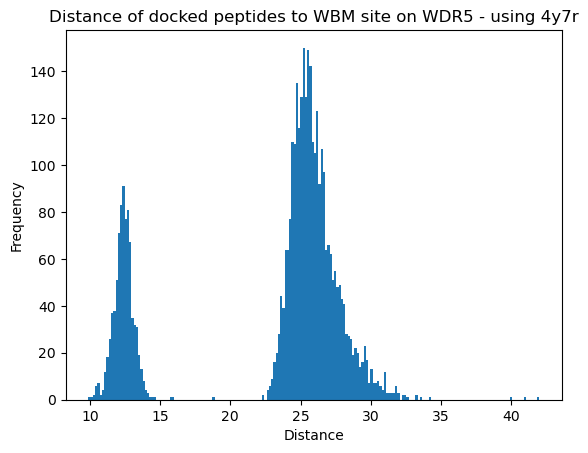

In [6]:
import matplotlib.pyplot as plt
plt.hist(np.linalg.norm(wbm_site_coords - np.array(list(means.values())), axis=1), bins=200)
plt.title("Distance of docked peptides to WBM site on WDR5 - using 4y7r")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

In [7]:
count = 0
wbm_peptides = []
for key, val in means.items():
    dist = np.linalg.norm(val - wbm_site_coords)
    if dist < 15:
        count += 1
        files = os.listdir(key)
        for file in sorted(files):
            if file.startswith("rank10"):
                continue
            if file.startswith("rank3"):
                break
            if file.endswith(".sdf") and "confidence" in file:
                coords = read_sdf_and_get_coordinates(os.path.join(key, file))
                try:
                    mean = np.array(coords["Molecule_0"]).mean(axis=0)
                    dist = np.linalg.norm(mean - wbm_site_coords)
                    print(key, file, dist)
                except Exception as e:
                    print(key, file, e)
        wbm_peptides.append(key)

/n/holyscratch01/mzitnik_lab/afang/WDR5_docked_4y7r/ETDGWELWLRYWK rank1_confidence-3.29.sdf 13.101066471746762
/n/holyscratch01/mzitnik_lab/afang/WDR5_docked_4y7r/ETDGWELWLRYWK rank2_confidence-3.40.sdf 12.93475010154167
/n/holyscratch01/mzitnik_lab/afang/WDR5_docked_4y7r/WFQLHFWPFQFFK rank1_confidence-3.87.sdf 12.727598966899373
/n/holyscratch01/mzitnik_lab/afang/WDR5_docked_4y7r/WFQLHFWPFQFFK rank2_confidence-4.04.sdf 32.13621994248091
/n/holyscratch01/mzitnik_lab/afang/WDR5_docked_4y7r/YWVVKLEWMQKRK rank1_confidence-3.28.sdf 12.739187992733816
/n/holyscratch01/mzitnik_lab/afang/WDR5_docked_4y7r/YWVVKLEWMQKRK rank2_confidence-3.79.sdf 24.328355460024824
/n/holyscratch01/mzitnik_lab/afang/WDR5_docked_4y7r/VAYFWYQVHVYDK rank1_confidence-3.53.sdf 11.536696125967815
/n/holyscratch01/mzitnik_lab/afang/WDR5_docked_4y7r/VAYFWYQVHVYDK rank2_confidence-3.57.sdf 12.589367958721711
/n/holyscratch01/mzitnik_lab/afang/WDR5_docked_4y7r/YAWFASYPWYWHK rank1_confidence-3.93.sdf 12.096386957830726
/n/

In [9]:
wbm_peptides_txt = [os.path.basename(x) for x in wbm_peptides]
with open("wbm_peptides_4y7r.txt", "w") as f:
    for peptide in wbm_peptides_txt:
        f.write(peptide + "\n")

['ETDGWELWLRYWK',
 'WFQLHFWPFQFFK',
 'YWVVKLEWMQKRK',
 'VAYFWYQVHVYDK',
 'YAWFASYPWYWHK',
 'MHLAFFHFALTEK',
 'WEWKLPFLVLTFK',
 'VDLMYLLLPVEWK',
 'GLFDLFWTMFAVK',
 'QDVVYVTHFFYAK',
 'WVVFFVPVFLPLK',
 'MPVHYWYWSFMLK',
 'WLSVDWVGASWLK',
 'VTVQLMFHLLLTK',
 'WWLDQLVWFHSVK',
 'SYFVNFVMKLVLK',
 'WQQVNLVDVLTWK',
 'DVYVHFKWTAKGK',
 'WGAKEYSMVFYFK',
 'VALFFTYFLPAGK',
 'PPFHVLYFFGGWK',
 'YSSREFQFSVFAK',
 'DDHVDYSYVFLWK',
 'YMAGHAFAFLRWK',
 'VLRLEVEHELLVK',
 'VLYQNAVFVWQFK',
 'LFNYALWWQLFTK',
 'FSVKFNEFELEWK',
 'PPLQLVDVWLGFK',
 'TDVYWWWTTTYHK',
 'WQFTYVQYDTKFK',
 'ENFFEEHVQVFWK',
 'ENFMLLYWGTWEK',
 'KGFDLNVALFRTK',
 'FFGFTFTLVNQKK',
 'KFDFTHQFVLWWK',
 'DTHPRWTLEVLVK',
 'WYFSNYFFLKYTK',
 'VDFLAFVHYMLAK',
 'FFQNLRYLWYFLK',
 'LHLHFSVVANEAK',
 'FVWFMWPWTDTWK',
 'VTFVHFFGMWVAK',
 'REEVFVTVHFMFK',
 'WESNWMTPWWFLK',
 'VVTVYKFHVDVFK',
 'MAHWLFVANFQFK',
 'QAWGFHLGVLYGK',
 'EFFPELKLLMLWK',
 'AKWVVWADWSTRK',
 'APQFSMVLSLAWK',
 'AEFFLFFKPNVDK',
 'LMEVSLWFYWFNK',
 'PVLKYDWLFWMLK',
 'LPNYLVEAMLFTK',
 'WYMKVATH

### Create a dataset for finetuning the model on

In [1]:
import pickle
with open("/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/wbm_peptides_4y7r.txt", "r") as f:
    wbm_peptides = f.readlines()
    wbm_peptides = [x.strip() for x in wbm_peptides]
with open("/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/wdr5_4y7r_docked_canonical_peptides.pkl", "rb") as f:
    dataset = pickle.load(f)

In [5]:
count = 0
for peptide in wbm_peptides:
    if "EEIDVV" in peptide:
        count += 1
count

0

In [2]:
for entry in dataset:
    if entry["id"] in wbm_peptides:
        entry["label"] = 1
    else:
        entry["label"] = 0

In [3]:
train = dataset[:int(0.8*len(dataset))]
valid = dataset[int(0.8*len(dataset)):int(0.9*len(dataset))]
test = dataset[int(0.9*len(dataset)):]

def get_num_positives(dataset):
    return sum([entry["label"] for entry in dataset])

print("train:", len(train), get_num_positives(train), get_num_positives(train)/len(train))
print("valid:", len(valid), get_num_positives(valid), get_num_positives(valid)/len(valid))
print("test:", len(test), get_num_positives(test), get_num_positives(test)/len(test))

train: 3031 642 0.2118112834048169
valid: 379 96 0.2532981530343008
test: 379 85 0.22427440633245382


In [4]:
with open("/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/datasets/wdr5_4y7r_docked_train.pkl", "wb") as f:
    pickle.dump(train, f)
with open("/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/datasets/wdr5_4y7r_docked_valid.pkl", "wb") as f:
    pickle.dump(valid, f)
with open("/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/datasets/wdr5_4y7r_docked_test.pkl", "wb") as f:
    pickle.dump(test, f)

In [13]:
import shutil
for peptide in wbm_peptides:
    peptide_name = os.path.basename(peptide)
    shutil.copyfile(f"{peptide}/rank1.sdf", f"/n/holyscratch01/mzitnik_lab/afang/WDR5_docked_WBM/{peptide_name}.sdf")

# Analyse Embeddings of Docked Structure with InteractNN

In [14]:
import pickle

In [15]:
with open("/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/wdr5_docked_canonical_peptides_embeddings.pkl", "rb") as f:
    embeddings = pickle.load(f)

In [16]:
from umap import UMAP
import numpy as np
import pandas as pd

n_neighbors = 10
min_dist = 0.5
umap_2d = UMAP(
    n_components=2,
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    init="random",
    random_state=0,
)
graph_embeddings = np.array([x["graph_embedding"] for x in embeddings])
print(graph_embeddings.shape)
proj_2d_graph = umap_2d.fit_transform(graph_embeddings)
umap_df = pd.DataFrame(columns=["x", "y"])
umap_df["x"] = proj_2d_graph[:, 0]
umap_df["y"] = proj_2d_graph[:, 1]

(3790, 40)


/n/home13/afang/.conda/envs/interactenv1/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [18]:
wbm_peptide_names = [os.path.basename(x) for x in wbm_peptides]
umap_df["id"] = [x["id"] for x in embeddings]
umap_df["wbm_site"] = [x in wbm_peptide_names for x in umap_df["id"]]
umap_df

,x,y,id,wbm_site
0,1.126584,2.911199,MSRFRLGGYFYYK,False
1,3.947262,5.005153,FAWNLEWLANWFK,False
2,-5.012053,11.777593,GVKGGQVMKGGVK,False
3,-3.044390,6.452184,WGGYYNYWFVTQK,False
4,3.121867,0.086223,WQPYTSWWMQYWK,False
...,...,...,...,...
3785,-0.249949,7.162766,LSGMYWAVSFTPK,False
3786,4.284420,-2.428938,GRATQVYEWQKPK,False
3787,5.107115,7.119875,FYLWYMWPYWNTK,False
3788,8.568791,7.080379,WGYSGYFVNGTLK,False


In [20]:
with open("/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/wdr5_docked_canonical_peptides.pkl", "rb") as f:
    peptides = pickle.load(f)

In [22]:
umap_df[umap_df["wbm_site"]==True]

,x,y,id,wbm_site
21,13.231998,0.000084,AEYSYFHYHGEWK,True
79,2.830453,4.451091,SYFVNFVMKLVLK,True
285,-0.299657,6.822095,MHHYYFYWELVHK,True
441,9.509220,3.139897,NMFDFHLVWTTVK,True
730,8.867316,-2.947193,ASYQYVGWMGTWK,True
745,4.824223,5.920678,HTLFWSLNFYTEK,True
754,3.925779,3.126388,MYENLWWFHFLVK,True
804,5.229348,3.882873,WSDYLLSYQVTAK,True
883,15.788467,3.887869,EMVYFWYHNVFFK,True
952,12.977054,6.417292,ETYSYTLQYLFWK,True


In [29]:
for wbm_peptide in wbm_peptide_names:
    peptides_id = [x["id"] for x in peptides]
    data_id = peptides_id.index(wbm_peptide)
    print(np.linalg.norm(np.array(peptides[data_id]["data"]["X"]).mean(axis=0) - wbm_site_coords))

8.5079858457655
7.615935410397929
8.504576840476743
8.306552777832128
8.15039929452705
7.732982964581528
7.6229994201257085
8.459461373184126
8.93152625049301
8.33568553025818
8.912679065206044
8.484982073361758
7.632753640929756
7.91642658943474
8.215835793895998
6.471129497656631
8.048920564142877
8.785339873537172
8.73818118486664
8.944757799541879
6.992911759757333
7.538950357470229
8.635704092151611
8.387571813804888
8.617392287463518
8.726850833174419
8.97957415596465
9.459573622873181
9.107461253244301
7.991138391340021
9.300290527315154
7.83397720336347
9.137677708845192
7.31557012793966
8.083592201076428
7.851057583070658
8.135434399422106
8.590508607400063
8.755571890663553
8.418129511994175
8.344427435513278
7.732911545821166
7.995443052438445
7.52043663819808
9.13599717775646
7.148009682505185
8.353830977043403


/tmp/ipykernel_2169520/2233967197.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/tmp/ipykernel_2169520/2233967197.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


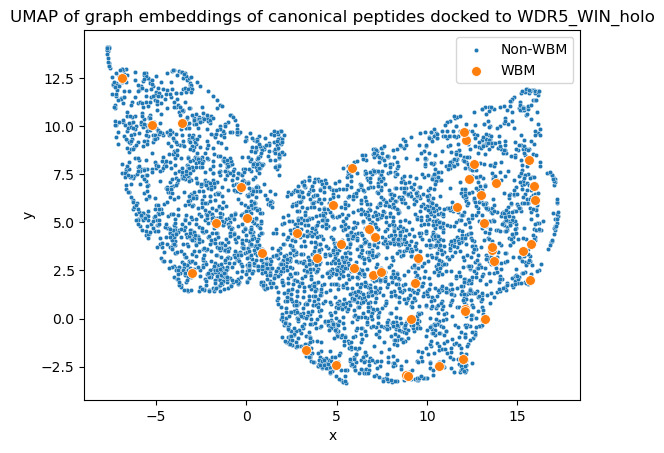

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=umap_df[umap_df["wbm_site"]==False], x="x", y="y", palette="viridis", s=10
)
sns.scatterplot(
    data=umap_df[umap_df["wbm_site"]==True], x="x", y="y", palette="viridis", s=50
)
plt.legend(["Non-WBM", "WBM"])
plt.title("UMAP of graph embeddings of canonical peptides docked to WDR5_WIN_holo")
plt.show()